In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

https://stackoverflow.com/questions/78693421/how-to-generate-specific-distribution

In [2]:
data = pd.read_excel("metric.xlsx")
x = data["metric"].values

In [52]:
def qqplot(data, law_factory, axe=None):
    
    if axe is None:
        fig, axe = plt.subplots()
    
    ecdf = stats.ecdf(data)
    
    parameters = np.array(law_factory.fit(data))
    law = law_factory(*parameters)

    quantiles = law.ppf(ecdf.cdf.probabilities)
    
    axe.scatter(quantiles, ecdf.cdf.quantiles, marker=".")
    axe.loglog(quantiles, quantiles, "--", color="black")
    axe.set_title("Q-Q Plot\n%s %s" % (law_factory.name, parameters,))
    axe.set_xlabel("Theoritical Quantile")
    axe.set_ylabel("Empirical Quantile")
    axe.grid()
    
    return axe

In [55]:
laws = [
    stats.weibull_min,
    stats.exponweib,
    stats.lognorm,
]

/home/jlandercy/.local/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6626: RuntimeWarning: divide by zero encountered in log
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)


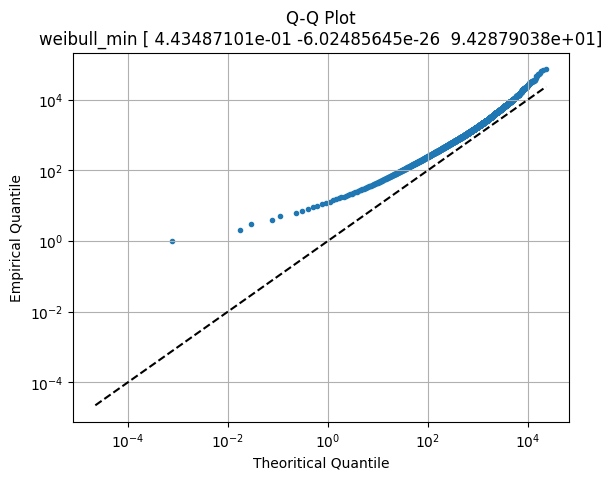

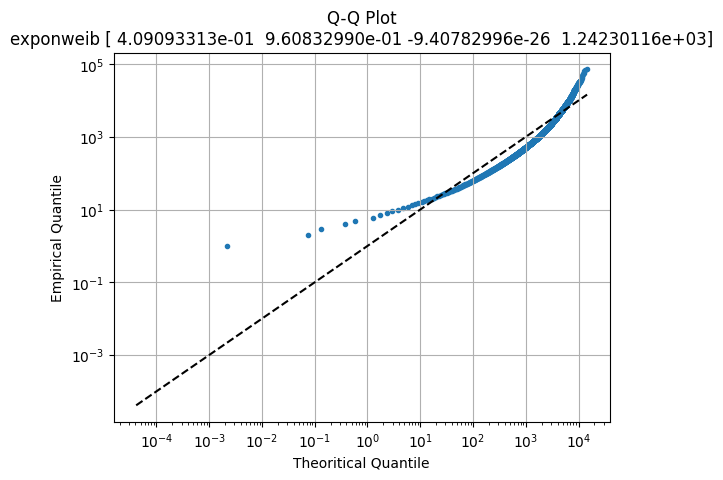

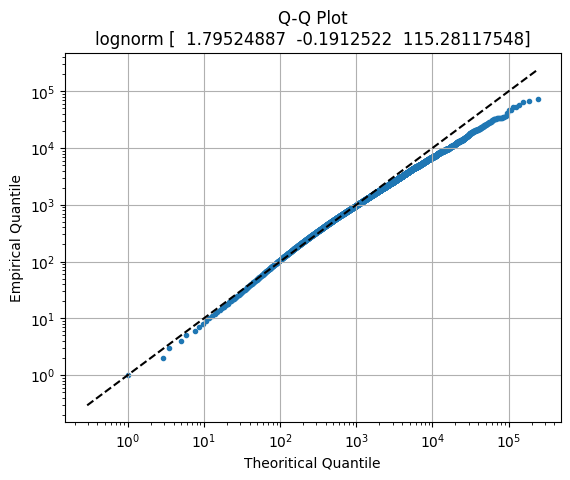

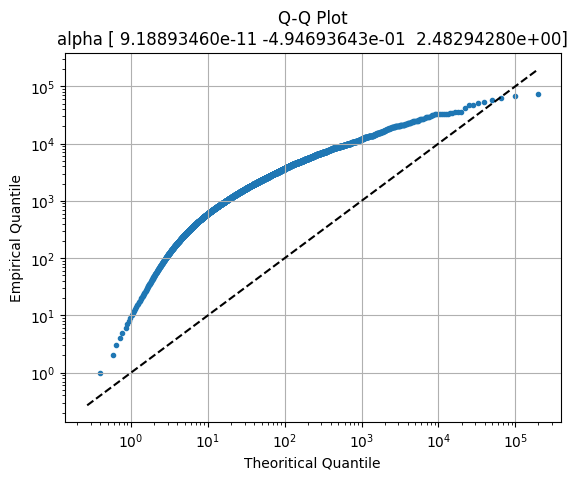

In [56]:
for law in laws:
    qqplot(x, law)

In [59]:
p0 = stats.weibull_min.fit(x)
law0 = stats.weibull_min(*p0)

In [64]:
p1 = stats.lognorm.fit(x)
law1 = stats.lognorm(*p1)

/home/jlandercy/.local/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6626: RuntimeWarning: divide by zero encountered in log
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)


In [65]:
xlin = np.linspace(x.min(), x.max(), 200)

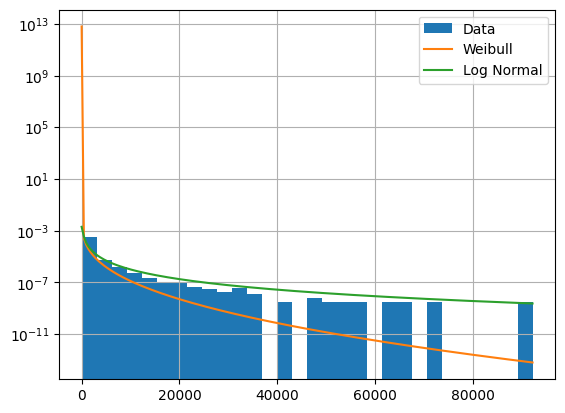

In [68]:
fig, axe = plt.subplots()
axe.hist(x, bins=30, density=1, label="Data")
axe.plot(xlin, law0.pdf(xlin), label="Weibull")
axe.plot(xlin, law1.pdf(xlin), label="Log Normal")
axe.legend()
axe.set_yscale("log")
axe.grid()